### 패키지 참조

In [1]:
from pandas import read_excel, to_datetime
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta
import seaborn as sb
import sys
sys.path.append("../")
from helper import set_datetime_index, exp_time_data

### 그래프 초기화

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (15, 5)
plt.rcParams["axes.unicode_minus"] = False

### 데이터 가져오기

In [3]:
df = read_excel("../Excel Data/세종시_친환경차_보급율_현황(2013_2023).xlsx")
df.head()

,년도,전기차(대수),전기차_전년대비_증가율,하이브리드(대수),하이브리드_전년대비_증가율,수소(대수),수소차_전년대비_증가율,친환경차총합(대수),친환경차총합_전년대비_증가율,친환경차외(대수),세종시차량총합(대수),친환경차비율(%)
0,201303,0,0.0,235,0.00,0,0.0,235,0.00,49328,49563,0.5
1,201306,0,0.0,282,0.20,0,0.0,282,0.20,50394,50676,0.5
2,201309,0,0.0,310,0.10,0,0.0,310,0.10,51188,51498,0.6
3,201312,4,4.0,346,0.11,0,0.0,350,0.13,52539,52889,0.6
4,201403,4,0.0,413,0.19,0,0.0,417,0.19,54975,55392,0.7


In [24]:
df.columns

Index(['년도', '전기차(대수)', '전기차_전년대비_증가율', '하이브리드(대수)', '하이브리드_전년대비_증가율',
       '수소(대수)', '수소차_전년대비_증가율', '친환경차총합(대수)', '친환경차총합_전년대비_증가율', '친환경차외(대수)',
       '세종시차량총합(대수)', '친환경차비율(%)'],
      dtype='object')

In [25]:
# 데이터 타입 확인
df.dtypes

년도                   int64
전기차(대수)              int64
전기차_전년대비_증가율       float64
하이브리드(대수)            int64
하이브리드_전년대비_증가율     float64
수소(대수)               int64
수소차_전년대비_증가율       float64
친환경차총합(대수)           int64
친환경차총합_전년대비_증가율    float64
친환경차외(대수)            int64
세종시차량총합(대수)          int64
친환경차비율(%)          float64
dtype: object

In [26]:
df1=df.filter(['년도','전기차(대수)','하이브리드(대수)','수소(대수)','친환경차총합(대수)','친환경차외(대수)','세종시차량총합(대수)','친환경차비율(%)'])
df1.head()

,년도,전기차(대수),하이브리드(대수),수소(대수),친환경차총합(대수),친환경차외(대수),세종시차량총합(대수),친환경차비율(%)
0,201303,0,235,0,235,49328,49563,0.5
1,201306,0,282,0,282,50394,50676,0.5
2,201309,0,310,0,310,51188,51498,0.6
3,201312,4,346,0,350,52539,52889,0.6
4,201403,4,413,0,417,54975,55392,0.7


In [27]:
df1['년도'] = to_datetime(df1['년도'], format="%Y%m")
df1.head()

,년도,전기차(대수),하이브리드(대수),수소(대수),친환경차총합(대수),친환경차외(대수),세종시차량총합(대수),친환경차비율(%)
0,2013-03-01,0,235,0,235,49328,49563,0.5
1,2013-06-01,0,282,0,282,50394,50676,0.5
2,2013-09-01,0,310,0,310,51188,51498,0.6
3,2013-12-01,4,346,0,350,52539,52889,0.6
4,2014-03-01,4,413,0,417,54975,55392,0.7


In [11]:
df1 = set_datetime_index(df1,'년도')
df1.head()

,전기차(대수),하이브리드(대수),수소(대수),친환경차총합(대수),친환경차외(대수),세종시차량총합(대수),친환경차비율(%)
2013-03-01,0,235,0,235,49328,49563,0.5
2013-06-01,0,282,0,282,50394,50676,0.5
2013-09-01,0,310,0,310,51188,51498,0.6
2013-12-01,4,346,0,350,52539,52889,0.6
2014-03-01,4,413,0,417,54975,55392,0.7


결측치 수: 0


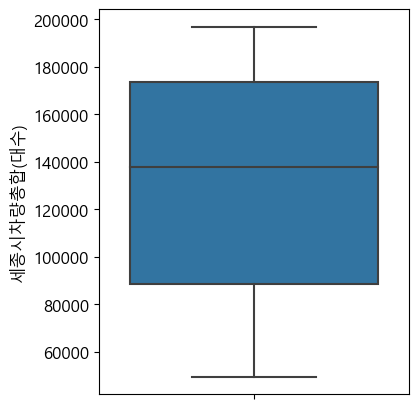

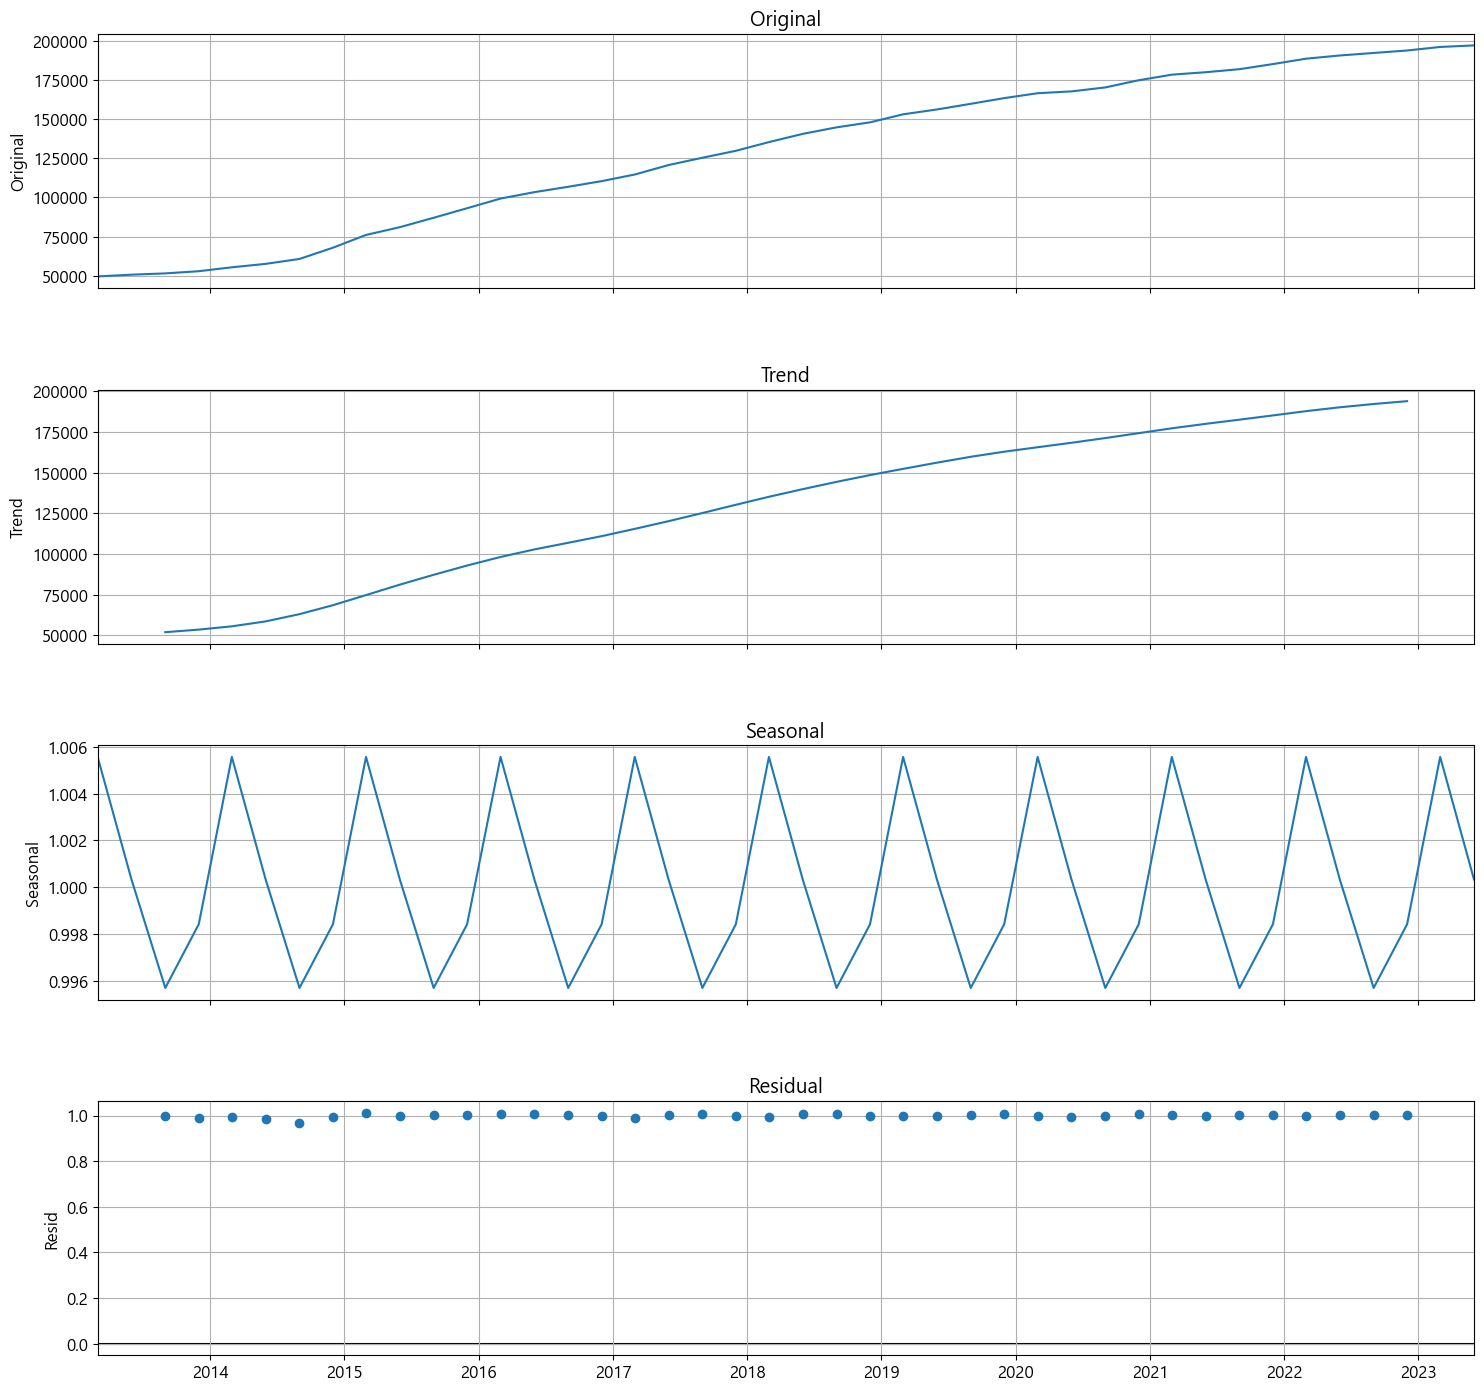

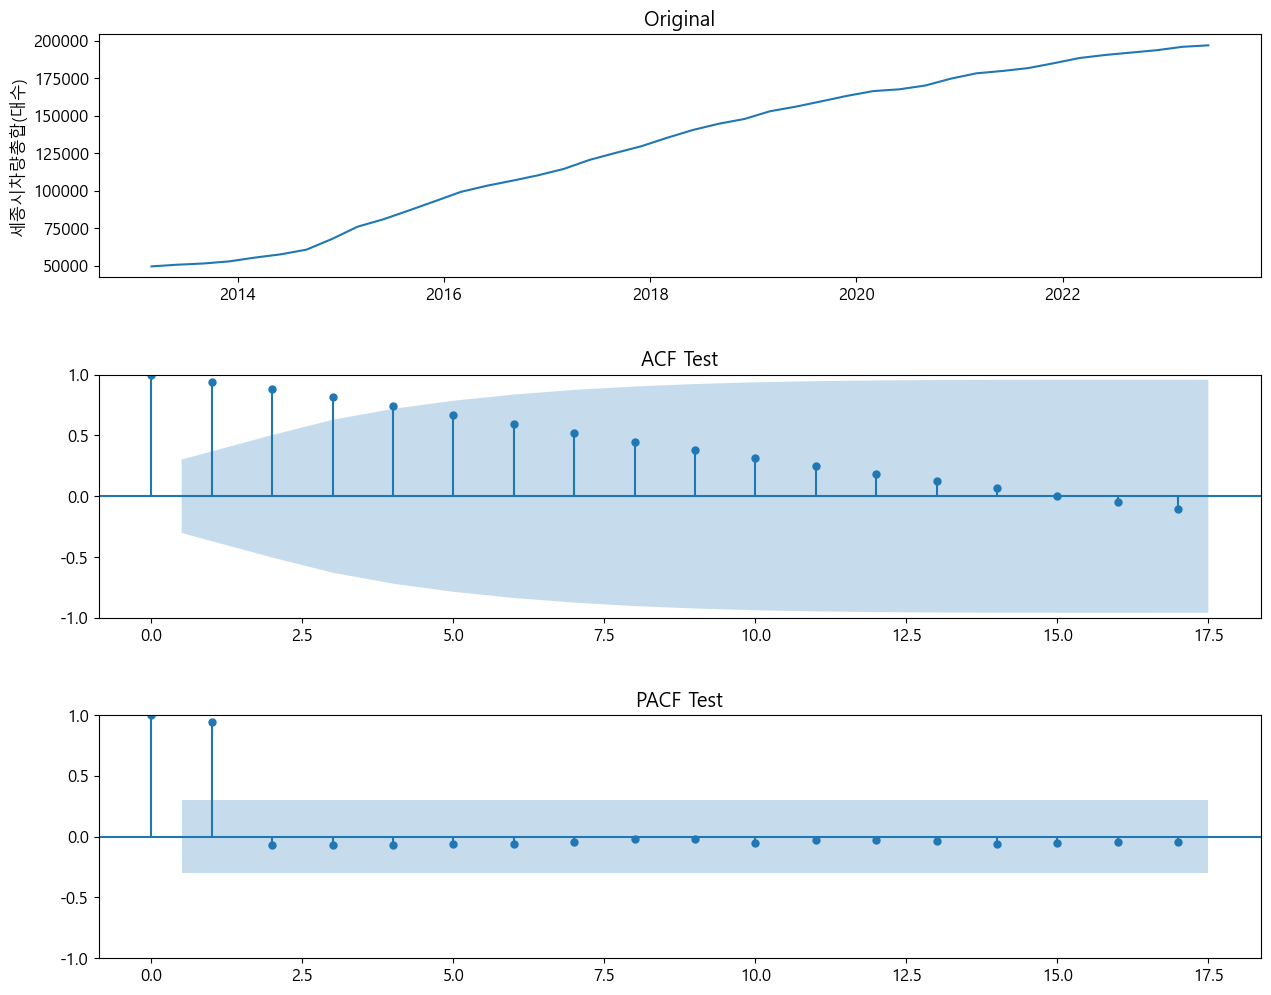

=========== 원본 데이터 ===========
+------------------------------------+----------+
| ADF Test                           |          |
|------------------------------------+----------|
| 검정통계량(ADF Statistic)          |  -2.0715 |
| 유의수준(p-value)                  | 0.256127 |
| 최적차수(num of lags)              |       10 |
| 관측치 개수(num of observations)   |       31 |
| 기각값(Critical Values) 1%         | -3.66143 |
| 기각값(Critical Values) 5%         | -2.96053 |
| 기각값(Critical Values) 10%        | -2.61932 |
| 데이터 정상성 여부(0=Flase,1=True) |        0 |
+------------------------------------+----------+
=========== 1차 차분 데이터 ===========
+------------------------------------+----------+
| ADF Test                           |          |
|------------------------------------+----------|
| 검정통계량(ADF Statistic)          | 0.417588 |
| 유의수준(p-value)                  | 0.982141 |
| 최적차수(num of lags)              |        8 |
| 관측치 개수(num of observations)   |       32 |
| 기각값(Critical Values) 1%         | -3

In [12]:
exp_time_data(data=df1, yname="세종시차량총합(대수)", sd_model='m', max_diff=10)

In [13]:
model = ARIMA(df1['세종시차량총합(대수)'], order= (1,1,0), seasonal_order=(1,1,0,3))
fit = model.fit()
print(fit.summary())

                                    SARIMAX Results                                    
Dep. Variable:                     세종시차량총합(대수)   No. Observations:                   42
Model:             ARIMA(1, 1, 0)x(1, 1, 0, 3)   Log Likelihood                -341.463
Date:                         Sun, 15 Oct 2023   AIC                            688.926
Time:                                 19:36:11   BIC                            693.839
Sample:                             03-01-2013   HQIC                           690.674
                                  - 06-01-2023                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0169      0.048      0.352      0.725      -0.077       0.111
ar.S.L3       -0.0603      0.157     -0.384      0.701     

In [14]:
fv = fit.fittedvalues
fv.head()

2013-03-01        0.000000
2013-06-01    50060.394337
2013-09-01    50662.130283
2013-12-01    89247.911915
2014-03-01    53454.166064
Freq: QS-DEC, dtype: float64

In [15]:
fc = fit.forecast(365)
fc.head()

2023-09-01    198634.850693
2023-12-01    200879.919218
2024-03-01    201907.834309
2024-06-01    203576.601189
2024-09-01    205822.449796
Freq: QS-DEC, Name: predicted_mean, dtype: float64

In [16]:
last = df1.index.max()
xmin = last-timedelta(days=365)
xmax = last+timedelta(days=365+10)
ymax = df1['세종시차량총합(대수)'][xmin:xmax].max()
ymin = df1['세종시차량총합(대수)'][xmin:xmax].min()
xmin, xmax, ymax, ymin

(Timestamp('2022-06-01 00:00:00'),
 Timestamp('2024-06-10 00:00:00'),
 196960,
 190534)

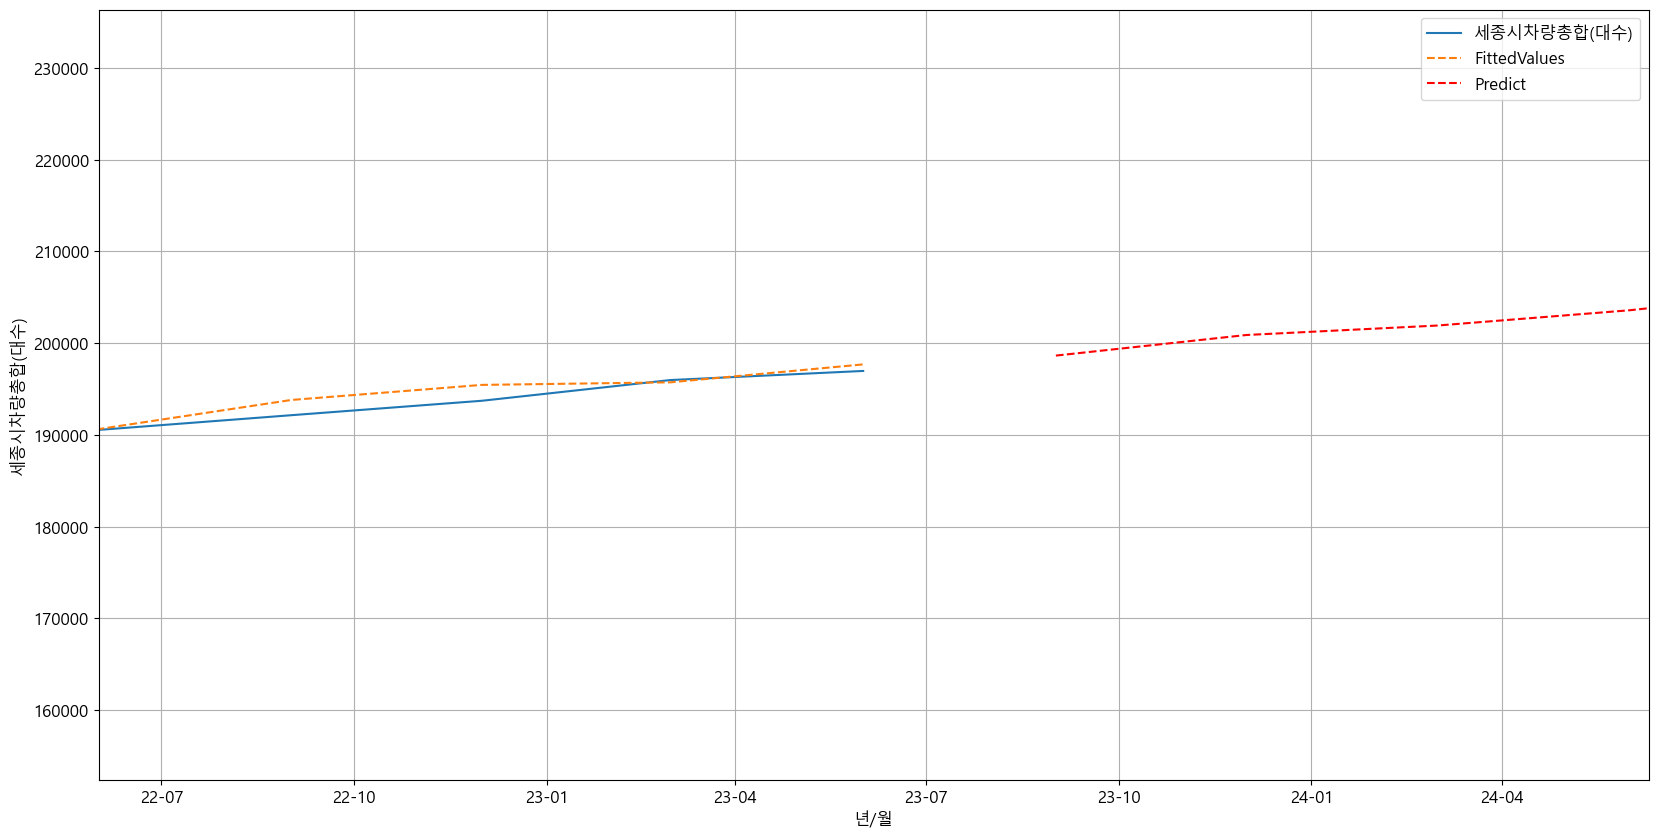

In [17]:
plt.figure(figsize=(20,10))

# 원본 데이터
sb.lineplot(data=df1, x=df1.index, y='세종시차량총합(대수)', label='세종시차량총합(대수)')

# 원본에 대한 학습결과
sb.lineplot(x=fv.index, y=fv.values, label='FittedValues', linestyle='--')

# 향후 1년간의 예측값
sb.lineplot(x=fc.index, y=fc.values, label='Predict', linestyle='--', color='red')

plt.xlabel('년/월')
plt.ylabel('세종시차량총합(대수)')
plt.legend()

plt.xlim([xmin, xmax])
plt.ylim([ymin * 0.8, ymax*1.2])

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y-%m')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()

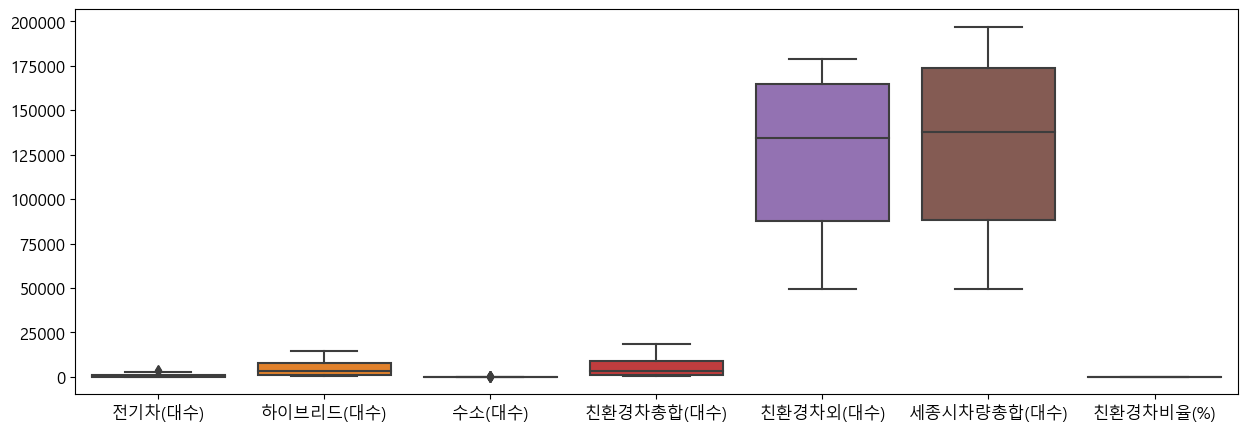

In [18]:
plt.figure(figsize=(15, 5))
sb.boxplot(data=df1)
plt.show()
plt.close()

### 학습 결과에 대한 예측값 생성

In [19]:
start_index = 0
end_index = len(df1['세종시차량총합(대수)'])
pd = fit.predict(start=start_index, end=end_index)
pd

2013-03-01         0.000000
2013-06-01     50060.394337
2013-09-01     50662.130283
2013-12-01     89247.911915
2014-03-01     53454.166064
2014-06-01     56209.117150
2014-09-01     60830.614706
2014-12-01     63137.677873
2015-03-01     70061.078764
2015-06-01     79168.269778
2015-09-01     87898.447793
2015-12-01     94752.349194
2016-03-01     97900.028826
2016-06-01    105332.503830
2016-09-01    109510.043832
2016-12-01    112803.165377
2017-03-01    114513.505426
2017-06-01    118168.971930
2017-09-01    124430.216197
2017-12-01    129499.883620
2018-03-01    135609.539460
2018-06-01    139841.229801
2018-09-01    144940.265963
2018-12-01    150258.981023
2019-03-01    153041.231125
2019-06-01    157175.460982
2019-09-01    159397.106603
2019-12-01    164829.073035
2020-03-01    166465.991849
2020-06-01    170032.073241
2020-09-01    171319.442901
2020-12-01    173232.063896
2021-03-01    176088.055066
2021-06-01    180916.615587
2021-09-01    184339.834334
2021-12-01    185156

### 이후 10 단계의 예측값 생성

In [20]:
fc = fit.forecast(10)
fc

2023-09-01    198634.850693
2023-12-01    200879.919218
2024-03-01    201907.834309
2024-06-01    203576.601189
2024-09-01    205822.449796
2024-12-01    206848.138007
2025-03-01    208517.271889
2025-06-01    210763.073439
2025-09-01    211788.895985
2025-12-01    213458.007727
Freq: QS-DEC, Name: predicted_mean, dtype: float64

### 관측치와 예측치의 비교 결과 시각화

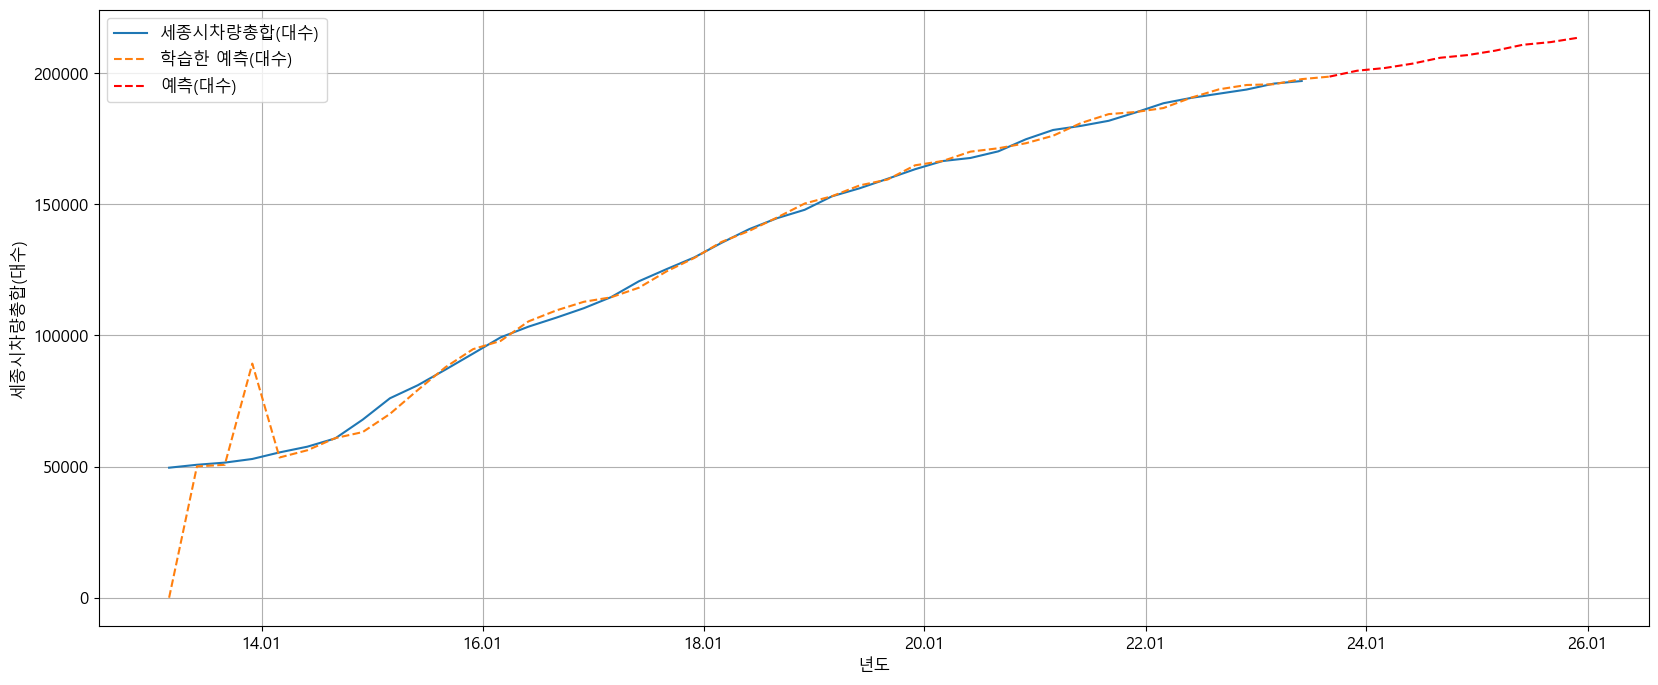

In [21]:
plt.figure(figsize=(20,8))

# 원본
sb.lineplot(x=df1.index, y=df1['세종시차량총합(대수)'], label='세종시차량총합(대수)')

# 원본을 토대로 학습하여 예측한 값
sb.lineplot(x=pd.index, y=pd, label='학습한 예측(대수)', linestyle='--')


sb.lineplot(x=fc.index, y=fc, label='예측(대수)', linestyle='--', color='red')

plt.xlabel('년도')
plt.ylabel('세종시차량총합(대수)')

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()